In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
%config InlineBackend.figure_formats = ['svg']

----

$\hbar = 1$

----
# Quantum Harmonic Oscillator

$$H = \omega \big({a^\dagger a + \frac{1}{2}} \big)$$


In [2]:
# truncated-Hilbert space dimension
N = 11 

# Frequency of the oscillator
w = 1 

# ladder operators
a = destroy(N)
a_dag = a.dag()


# Hamiltonian of SHO
H = w * (a_dag*a + 1/2)
H

Quantum object: dims=[[11], [11]], shape=(11, 11), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   1.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   2.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   3.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   4.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   5.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   6.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   7.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   8.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   9.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.5]]

In [3]:
# Ground and First excited state energies
E0, E1 = np.array(H.eigenenergies())[:2]
print(f"The Frequency is {w} = {E1 - E0} (Difference between the First excited state and Ground State)")

The Frequency is 1 = 1.0 (Difference between the First excited state and Ground State)


In [4]:
# Eigenvalues check
H.eigenenergies()

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5])

---

Initial state: $\frac{1}{2}(\ket{0} + \ket{1})$

In [6]:
# Intitial State
psi = (basis(N, 1) + basis(N, 0)).unit()
psi

Quantum object: dims=[[11], [1]], shape=(11, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

## Observables
$\langle x \rangle = \frac{a + a^\dagger}{2}$ \
$\langle p \rangle = \frac{a - a^\dagger}{2\iota}$

In [8]:
expect_x = 1/np.sqrt(2) * ( a + a_dag)
expect_p = 1/np.sqrt(2) * (a - a_dag)/1j

## Unitary Time Evolution

In [9]:
# Unitary Evolution
t = np.linspace(0.0, 10.0, 200)
result = sesolve(H, psi, t, e_ops = [expect_x, expect_p, expect_x**2, expect_p**2])

## Plots

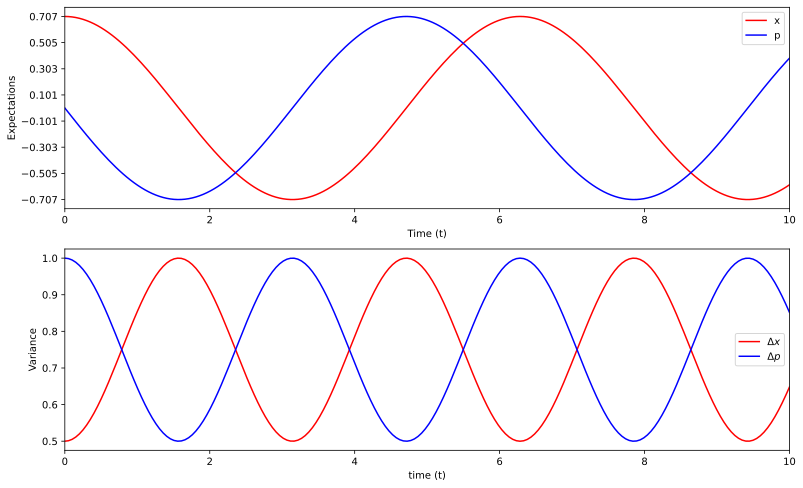

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(13, 8))
ax[0].plot(result.times, result.expect[0], 'r')
ax[0].plot(result.times, result.expect[1], 'b')
ax[1].plot(result.times, (result.expect[2] - result.expect[0]**2), 'r')
ax[1].plot(result.times, (result.expect[3] - result.expect[1]**2), 'b')
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Expectations')
ax[0].legend(('x', 'p'))
ax[0].set_xlim(0, 10)
ax[0].set_yticks(np.linspace(min(result.expect[0]), max(result.expect[0]), 8))

ax[1].set_xlabel('time (t)')
ax[1].set_ylabel('Variance')
ax[1].legend((r'$\Delta x$', r'$\Delta p$'))
ax[1].set_xlim(0, 10)
plt.show()

----
## Driven QHO

### Driving operator 
(similar to Pauli-x operator for a two-level system)\
$S_x = \ket{0} \bra{1} + \ket{1} \bra{0}$

In [14]:
Sx = basis(N, 0) * basis(N, 1).dag() + basis(N, 1) * basis(N, 0).dag()

In [44]:
def drive(t, args):
    return args["A"] * np.cos(args["wd"] * t)

H_total = [H, [Sx, drive]]

ground_pop = basis(N, 0) * basis(N, 0).dag()
first_excited_pop = basis(N, 1) * basis(N, 1).dag()

psi0 = basis(N, 0)
t = np.linspace(0.0, 100.0, 200)

result = sesolve(H_total, psi0, t, e_ops = [ground_pop, first_excited_pop], args={"A":1e-1, "wd":w}) # resonant drive wd = w.

## Rabi Oscillation

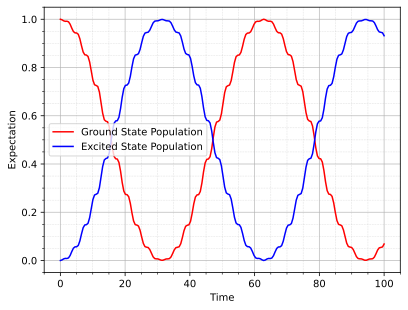

In [45]:
plt.plot(t, result.expect[0], 'r', label='Ground State Population')
plt.plot(t, result.expect[1], 'b', label='Excited State Population')
plt.xlabel('Time')
plt.ylabel('Expectation')
plt.minorticks_on()
plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend()
plt.show()